In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def cross_inh(x, mode=0, thresh=0.5):
    if mode==0:
        return 1.0
    elif mode==1:
        ci = 0.0 if x < thresh else 1.0
        return ci

# (EULER) INTEGRATION FUNCTIONS:
    
def rk4(y,dx,dydx,funcArgs):
    y = np.array(y)
    p = np.array(dydx(y,*funcArgs))*dx
    q = np.array(dydx(y+p/2,*funcArgs))*dx
    r = np.array(dydx(y+q/2,*funcArgs))*dx
    s = np.array(dydx(y+r,*funcArgs))*dx
    return y + (p+2*q+2*r+s)/6

# noise 0
# def pop_evo_eq(pop, q, cimode=0, cithresh=0.5):
def pop_evo_eq(pop, q):
    global cimode, cithresh
    u, x, y = pop[0], pop[1], pop[2]
    dxdt = x*(q*u - y*cross_inh(y,cimode,cithresh))
    dydt = y*(u - q*x*cross_inh(x,cimode,cithresh))
    return [-dxdt-dydt, dxdt, dydt]

# noise type 1
# def pop_evo_eq_noise1(pop, q, sig, cimode=0, cithresh=0.5):
def pop_evo_eq_noise1(pop, q, sig):
    global cimode, cithresh
    u, x, y = pop[0], pop[1], pop[2]
    dxdt = x*(q*u - y*cross_inh(y,cimode,cithresh)) + sig*(u/2-x)
    dydt = y*(u - q*x*cross_inh(x,cimode,cithresh)) + sig*(u/2-y)
    return [-dxdt-dydt, dxdt, dydt]


# def integrate_evo(pop, q, sig, maxTime, cimode, cithresh):
def integrate_evo(pop, q, sig, maxTime):
    dt = 1
    pop_evo = [[pop[0], ], [pop[1], ], [pop[2], ]]
    for _ in range(maxTime):
        if sig == 0:
            pop = rk4(pop,dt,pop_evo_eq, (q,))
        else:
            pop = rk4(pop,dt,pop_evo_eq_noise1, (q,sig))
        for i in range(3):
            pop_evo[i].append(pop[i])
    return pop_evo

In [63]:
# quality ratio:
q = 1
# initial condition
# pop = [0.0, 0.8, 0.2]
pop = [0.0, 0.51, 0.49]
# integration time:
maxTime = 5000
# timestep:
dt = 1

# noise type 1:
sig = 0.4
# cross inhibition mode:
cimode=0
cithresh=0.6

# save time evo:
pop_evo = [[pop[0], ], [pop[1], ], [pop[2], ]]


for _ in range(maxTime):
    # dpopdt = pop_evo_eq(pop,q)
    # dpopdt = pop_evo_eq_noise1(pop,q,sig,cimode)
    # euler:
    # dpopdt = pop_evo_eq(pop,q,cimode)
    # pop = [pop+dpdt*dt for pop,dpdt in zip(pop,dpopdt)]
    # euler millorat:
    # dpopdt = pop_evo_eq(pop,q,cimode)
    # popaux = pop+dpopdt
    # dpopdtaux = pop_evo_eq(pop,q,cimode)
    # pop = [pop+0.5*(dpdt+dpdtaux) for pop,dpdt,dpdtaux in zip(pop,dpopdt,dpopdtaux)]
    # runge kutta 4:
    # pop = rk4(pop,1,pop_evo_eq,(q,))
    pop = rk4(pop,1,pop_evo_eq_noise1, (q,sig))
    for i in range(3):
        pop_evo[i].append(pop[i])

print((1-sig+np.sqrt(-sig**2+1-2*sig))/2)
print((1-sig-np.sqrt(-sig**2+1-2*sig))/2)
print(pop_evo[1][-1])
print(pop_evo[2][-1])

0.3999999999999999
0.20000000000000007
0.40000000000019403
0.19999999999990356


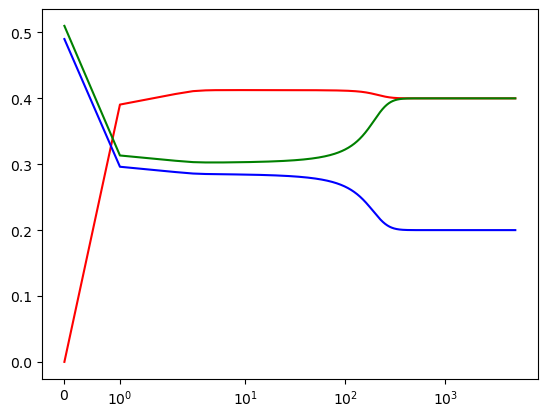

In [64]:
fig, ax = plt.subplots()
ax.set(xscale='symlog')

iters = list(range(maxTime+1))

ax.plot(iters, pop_evo[0], color='r')
ax.plot(iters, pop_evo[1], color='g')
ax.plot(iters, pop_evo[2], color='b')

In [71]:
cimode = 1
maxTime = 1000
# pop = [0.8, 0.1, 0.1]
pop = [0.0, 0.9, 0.1]
q = 1.1
sig = 0.3

threshs = np.arange(0.0, 1.0, 0.1)
stat_pops = [[], [], []]
for th in threshs:
    cithresh = th
    pop = [0.0, 0.5, 0.5]
    pop_evo = integrate_evo(pop, q, sig, maxTime)
    for i in range(3):
        stat_pops[i].append(pop_evo[i][-1])

cimode = 0
stat_pops_ci0 = []
pop = [0.0, 0.5, 0.5]
pop_evo = integrate_evo(pop, q, sig, maxTime)
for i in range(3):
    stat_pops_ci0.append(pop_evo[i][-1])


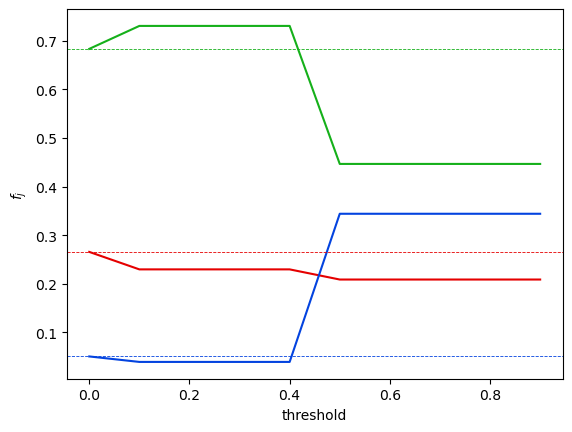

In [72]:
fig, ax = plt.subplots(1,1)
ax.set(xlabel='threshold', ylabel=r'$f_j$')
ax.plot(threshs, stat_pops[0], color='xkcd:red')
ax.plot(threshs, stat_pops[1], color='xkcd:green')
ax.plot(threshs, stat_pops[2], color='xkcd:blue')
ax.axhline(stat_pops_ci0[0], ls='--', lw=0.6, color='xkcd:red')
ax.axhline(stat_pops_ci0[1], ls='--', lw=0.6, color='xkcd:green')
ax.axhline(stat_pops_ci0[2], ls='--', lw=0.6, color='xkcd:blue')

### ODE FIXED POINTS; noise type 1, no zealots

In [53]:
def fixed_points(sig):
    fx1 = (1-sig+np.sqrt(-sig**2+1-2*sig))/2
    fx2 = (1-sig-np.sqrt(-sig**2+1-2*sig))/2
    return fx1, fx2

/tmp/ipykernel_157767/3906266655.py:2: RuntimeWarning: invalid value encountered in sqrt
  fx1 = (1-sig+np.sqrt(-sig**2+1-2*sig))/2
/tmp/ipykernel_157767/3906266655.py:3: RuntimeWarning: invalid value encountered in sqrt
  fx2 = (1-sig-np.sqrt(-sig**2+1-2*sig))/2


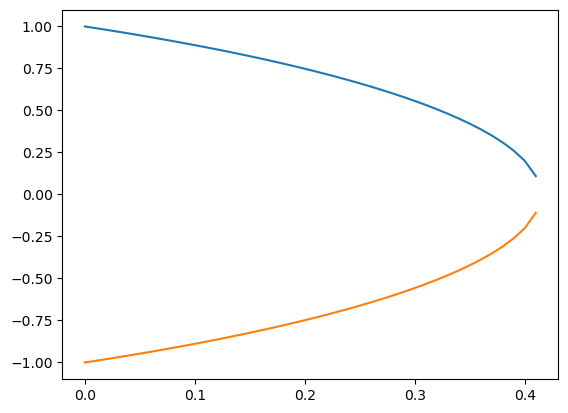

In [54]:
fig, ax = plt.subplots()

sigs = np.arange(0.0, 0.51, 0.01)
fxs = [[], []]
for sig in sigs:
    x,y = fixed_points(sig)
    fxs[0].append(x-y)
    fxs[1].append(y-x)

ax.plot(sigs, fxs[0])
ax.plot(sigs, fxs[1])
